In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
#torch.set_printoptions(edgeitems=2, threshold=50)

import imageio

In [2]:
dir_path = "data/volumetric-dicom/2-LUNG 3.0  B70f-04083"
vol_arr = imageio.volread(dir_path, 'DICOM')

Reading DICOM (examining files): 99/99 files (100.0%)
  Found 1 correct series.
Reading DICOM (loading data): 99/99  (100.0%)


In [3]:
vol_arr.shape, vol_arr.dtype

((99, 512, 512), dtype('int16'))

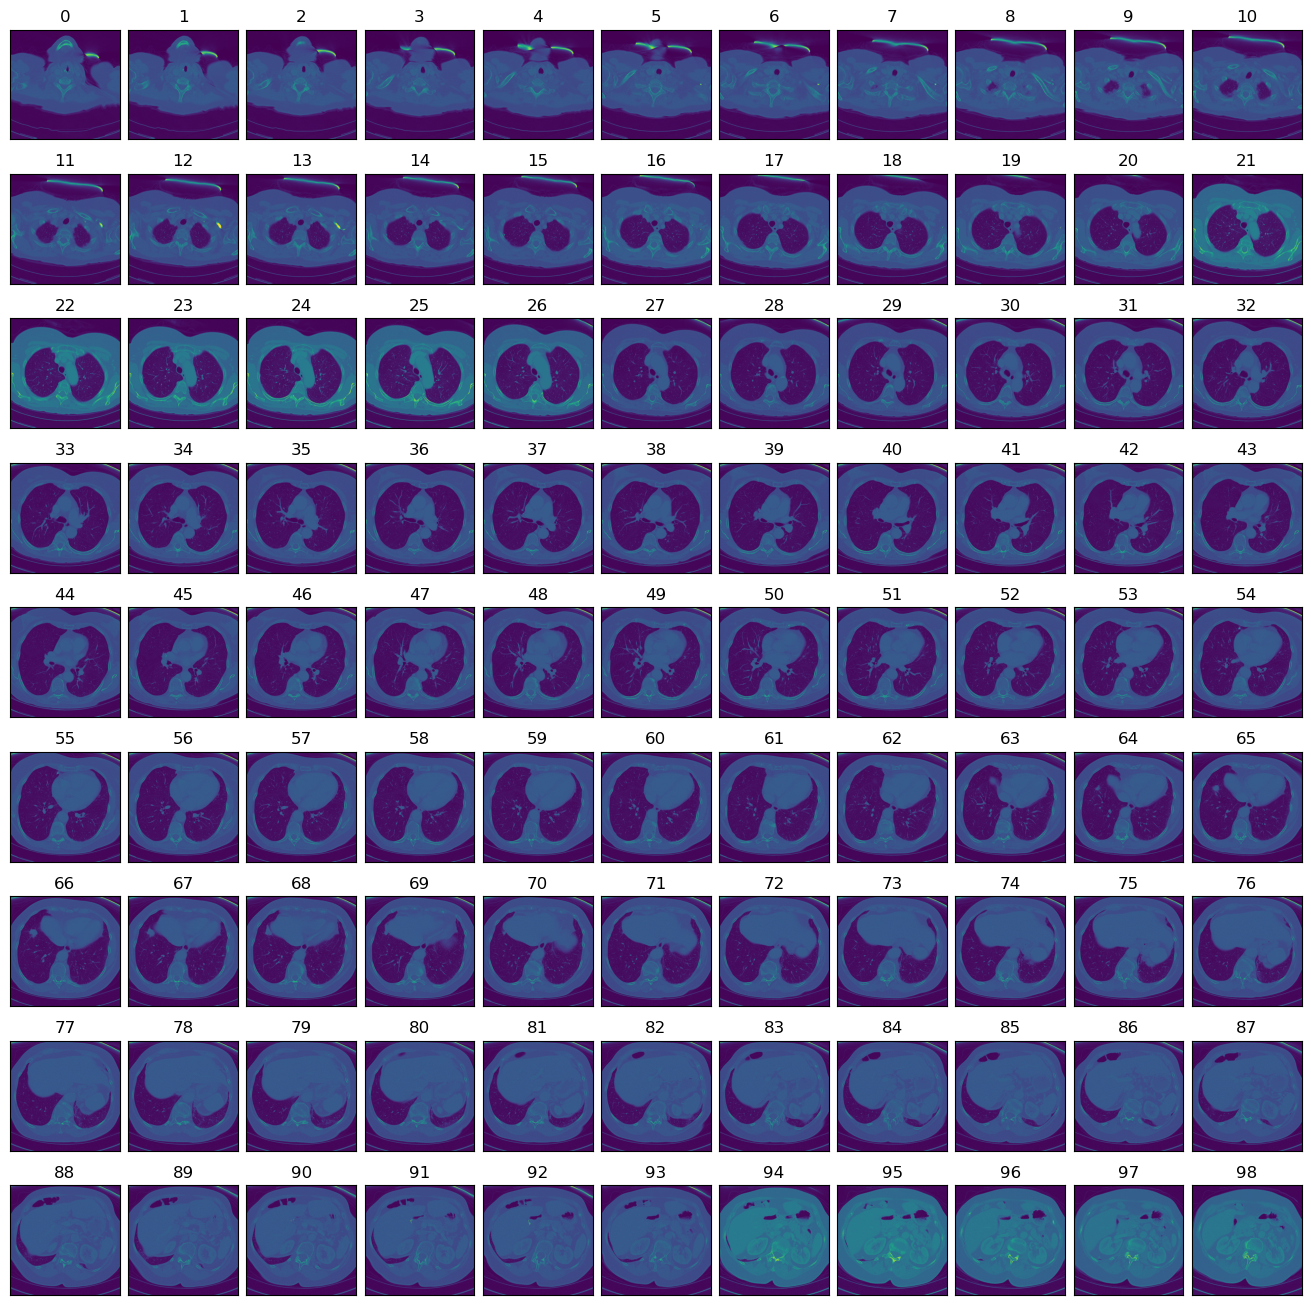

In [4]:
fig, ax = plt.subplots(9,11, figsize=(13,13), layout='constrained')
ax = ax.flatten()

for i in range(99):
    ax[i].imshow(vol_arr[i])
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].set_title(str(i))

plt.show()

**NB!:**
*схема расположения отличается от ожидаемого PyTorch из-за отсутствия информации о канале. Так что нужно дать место для измерения
channel с помощью `unsqueeze`:*

In [5]:
vol = torch.from_numpy(vol_arr).float()
vol = torch.unsqueeze(vol, 0)

vol.shape, vol.dtype

(torch.Size([1, 99, 512, 512]), torch.float32)